# 🔎 Análisis exploratorio: 🏃🏻‍➡️ Life Style Data 

## 1️⃣ **Entender el contexto del proyecto**

El análisis exploratorio que se va a realizar es sobre el dataset **Life Style Data**, el cuál puedes encontrar en el siguiente enlace:
🔗[https://www.kaggle.com/datasets/jockeroika/life-style-data](https://www.kaggle.com/datasets/jockeroika/life-style-data)

---

### 🎯 **Objetivo del análisis**

El propósito de este análisis es **explorar y comprender cómo los hábitos de vida, la alimentación y la actividad física influyen en distintos indicadores de salud y rendimiento físico**.  

A través de un análisis exploratorio detallado, se pretende:
- Identificar patrones generales en los datos relacionados con el estilo de vida de los participantes.  
- Evaluar la relación entre variables como la frecuencia de ejercicio, la dieta, el IMC y el consumo calórico.  
- Detectar posibles valores atípicos o inconsistencias en los datos que puedan afectar el modelado posterior.  
- Preparar el dataset para aplicar modelos predictivos que permitan **estimar indicadores de salud o rendimiento físico** (por ejemplo, las calorías quemadas o el porcentaje de grasa corporal).  

Además, en etapas posteriores se implementarán técnicas de **regresión lineal (simple y múltiple)**, **regularización (Ridge y Lasso)**, y **modelos de aprendizaje automático basados en árboles de decisión y ensambles (Random Forest y Gradient Boosting)** para comparar su rendimiento y capacidad predictiva.

En conjunto, este proyecto busca **extraer información útil y visualmente comprensible** sobre los factores que contribuyen a un estilo de vida saludable, apoyando la toma de decisiones y el diseño de rutinas personalizadas.

---

### 🧩 **Significado de las variables**

| **Columna** | **Descripción** |
|--------------|----------------|
| `Age` | Edad del participante (en años). |
| `Gender` | Género biológico (Masculino/Femenino). |
| `Weight (kg)` | Peso del individuo en kilogramos. |
| `Height (m)` | Altura del individuo en metros. |
| `Max_BPM` | Frecuencia cardíaca máxima registrada durante una sesión de ejercicio. |
| `Avg_BPM` | Frecuencia cardíaca promedio mantenida durante la sesión. |
| `Resting_BPM` | Frecuencia cardíaca en reposo antes de iniciar el entrenamiento. |
| `Session_Duration (hours)` | Duración de la sesión de ejercicio, en horas. |
| `Calories_Burned` | Total de calorías quemadas durante la sesión. |
| `Workout_Type` | Tipo de entrenamiento realizado (por ejemplo: fuerza, HIIT, cardio). |
| `Fat_Percentage` | Porcentaje de grasa corporal del individuo. |
| `Water_Intake (liters)` | Promedio diario de consumo de agua, en litros. |
| `Workout_Frequency (days/week)` | Número de días de entrenamiento por semana. |
| `Experience_Level` | Nivel de experiencia física (1 = Principiante, 2 = Intermedio, 3 = Avanzado). |
| `BMI` | Índice de Masa Corporal (IMC), medida de grasa corporal basada en peso y altura. |
| `Daily meals frequency` | Número de comidas consumidas diariamente. |
| `Physical exercise` | Indica el tipo o la frecuencia de la actividad física realizada. |
| `Carbs` | Consumo diario de carbohidratos (en gramos). |
| `Proteins` | Consumo diario de proteínas (en gramos). |
| `Fats` | Consumo diario de grasas (en gramos). |
| `Calories` | Total de calorías ingeridas a través de la alimentación diaria. |
| `meal_name` | Nombre de la comida (por ejemplo: desayuno, almuerzo, cena). |
| `meal_type` | Tipo de comida (por ejemplo: snack, plato principal, bebida). |
| `diet_type` | Tipo de dieta seguida (por ejemplo: cetogénica, vegana, equilibrada). |
| `sugar_g` | Contenido de azúcar en gramos por comida. |
| `sodium_mg` | Contenido de sodio en miligramos por comida. |
| `cholesterol_mg` | Contenido de colesterol en miligramos por comida. |
| `serving_size_g` | Tamaño de la porción del alimento en gramos. |
| `cooking_method` | Método de cocción utilizado (por ejemplo: hervido, frito, a la parrilla). |
| `prep_time_min` | Tiempo de preparación de la comida, en minutos. |
| `cook_time_min` | Tiempo de cocción de la comida, en minutos. |
| `rating` | Valoración de la comida o entrenamiento (escala de 1 a 5). |
| `Name of Exercise` | Nombre del ejercicio realizado. |
| `Sets` | Número de series completadas en el ejercicio. |
| `Reps` | Número de repeticiones por serie. |
| `Benefit` | Descripción del beneficio físico del ejercicio. |
| `Burns Calories (per 30 min)` | Calorías estimadas que se queman en 30 minutos de ese ejercicio. |
| `Target Muscle Group` | Grupo muscular principal trabajado en el ejercicio. |
| `Equipment Needed` | Equipamiento necesario para realizar el ejercicio. |
| `Difficulty Level` | Nivel de dificultad del ejercicio (Principiante, Intermedio, Avanzado). |
| `Body Part` | Parte del cuerpo principalmente involucrada (por ejemplo: brazos, piernas, pecho). |
| `Type of Muscle` | Tipo de músculo implicado (por ejemplo: superior, core, fuerza de agarre). |
| `Workout` | Nombre específico del entrenamiento o ejercicio. |

---

🗒️ *Fuente de los datos: Kaggle - Global Coffee Health Dataset (2024)*  

---

Lo primero de todo, será importar todas las librerías que vayamos a usar para realizar el análisis

In [57]:
import warnings
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso, LassoCV, LinearRegression, Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
warnings.filterwarnings('ignore')


## 2️⃣ **Análisis descriptivo inicial**

Antes de comenzar con el análisis y la limpieza de datos, realizamos un **análisis descriptivo inicial** del dataset con el objetivo de conocer su estructura, tamaño y el tipo de información que contiene.

Este paso nos permite identificar el número de registros disponibles, las columnas existentes y obtener una primera impresión sobre la distribución general de los datos.

In [12]:
# Cargar el dataset
df = pd.read_csv("data/life_style_data.csv")

Mostraremos la cantidad total de filas de nuestro dataset y todas las columnas que contiene para hacernos una idea de los datos que tenemos

In [13]:
# Mostrar la cantidad total de filas y columnas del dataset
print(f"🌍 Total de filas del dataset: {len(df)}\n------------------------------------------------------------------------------")
print(df.columns)

🌍 Total de filas del dataset: 20000
------------------------------------------------------------------------------
Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
       'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins',
       'Fats', 'Calories', 'meal_name', 'meal_type', 'diet_type', 'sugar_g',
       'sodium_mg', 'cholesterol_mg', 'serving_size_g', 'cooking_method',
       'prep_time_min', 'cook_time_min', 'rating', 'Name of Exercise', 'Sets',
       'Reps', 'Benefit', 'Burns Calories (per 30 min)', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'BMI_calc', 'cal_from_macros', 'pct_carbs', 'protein_per_kg',
       'pct_HRR', 'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'exp

Mostramos también los datos que contienen las primeras 5 filas

In [14]:
print("\n🔎 Primeras 5 filas del dataset:\n")
print(df.head())


🔎 Primeras 5 filas del dataset:

     Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0  34.91    Male        65.27        1.62   188.58   157.65        69.05   
1  23.37  Female        56.41        1.55   179.43   131.75        73.18   
2  33.20  Female        58.98        1.67   175.04   123.95        54.96   
3  38.69  Female        93.78        1.70   191.21   155.10        50.07   
4  45.09    Male        52.42        1.88   193.58   152.88        70.84   

   Session_Duration (hours)  Calories_Burned Workout_Type  ...  \
0                      1.00          1080.90     Strength  ...   
1                      1.37          1809.91         HIIT  ...   
2                      0.91           802.26       Cardio  ...   
3                      1.10          1450.79         HIIT  ...   
4                      1.08          1166.40     Strength  ...   

   cal_from_macros  pct_carbs  protein_per_kg   pct_HRR  pct_maxHR  \
0          2139.59   0.500432        1.624

Por último, mostramos las estadísticas básicas de cada columna (cantidad total de filas, mediana, mínimo, máximo, 25%, 50%, 70%)

In [15]:
print("\n📊 Estadísticas descriptivas:\n")
print(df.describe())


📊 Estadísticas descriptivas:

                Age   Weight (kg)    Height (m)       Max_BPM       Avg_BPM  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      38.851453     73.898832      1.723093    179.889702    143.704306   
std       12.114580     21.173010      0.127033     11.510805     14.267688   
min       18.000000     39.180000      1.490000    159.310000    119.070000   
25%       28.170000     58.160000      1.620000    170.057500    131.220000   
50%       39.865000     70.000000      1.710000    180.140000    142.990000   
75%       49.630000     86.100000      1.800000    189.425000    156.060000   
max       59.670000    130.770000      2.010000    199.640000    169.840000   

        Resting_BPM  Session_Duration (hours)  Calories_Burned  \
count  20000.000000              20000.000000     20000.000000   
mean      62.195813                  1.259446      1280.109600   
std        7.289351                  0.341336       502.228

## 3️⃣ **Detección y tratamiento datos ausentes**

Antes de proceder con el análisis exploratorio y la creación de nuevas variables, es fundamental **verificar la existencia de valores nulos o ausentes** en el dataset.  

La presencia de datos faltantes puede afectar la precisión de los resultados, alterar las estadísticas descriptivas y comprometer el rendimiento de los modelos predictivos.  

Por ello, en esta sección se realiza una revisión general para comprobar si existen columnas o registros con valores nulos que deban ser tratados o imputados.

In [16]:
total_nulos = df.isnull().sum()
print(total_nulos)

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

Tras ejecutar el análisis, se observa que ninguna de las columnas contiene valores nulos.

Esto indica que el dataset está completo y no requiere imputación ni eliminación de registros, por lo que se puede continuar con el análisis exploratorio sin necesidad de realizar tratamientos adicionales sobre los datos faltantes.

## 4️⃣ **Revisar los tipos de las variables**

Una vez verificada la integridad de los datos, el siguiente paso consiste en **revisar los tipos de las variables** para asegurarnos de que cada columna tenga el formato adecuado según el tipo de información que representa.

Este proceso es fundamental para evitar errores en los cálculos posteriores y garantizar que las operaciones estadísticas o de modelado se apliquen correctamente.  

In [17]:
# Mostramos un resumen de los tipos de datos de cada columna
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

En este caso, hemos detectado algunas columnas que con formato decimal cuando deberían ser un número entero, por lo que convertiremos esas columnas para el correcto tratamiento de los datos.

Las columnas que vamos a convertir a número entero son: Workout_Frequency, Experience_level y Daily meals frequency.

El motivo para convertir estas columnas entero, son que, por ejemplo en el caso de `Workout_Frequency`, lo que representa es el número de días que la persona entrena por semana, no tiene sentido entrenar 3.6 días a la semana.

Por otro lado, en el caso de `Experience_Level` lo que representa es el nivel de experiencia física (1 = Principiante, 2 = Intermedio, 3 = Avanzado), son etiquéticas numéricas, por lo que no tiene sentido que sean float.

Por último, la variable `Daily meal frequency` representa el número de comidas, al igual que ocurre con `Workout_Frequency`, es uin conteo de comidas, 4 comidas, 5 comidas, no tiene sentido que nadie coma 4.3 veces al día.

In [18]:
df['Workout_Frequency'] = df['Workout_Frequency (days/week)'].astype(int)
df['Experience_Level'] = df['Experience_Level'].astype(int)
df['Daily meals frequency'] = df['Daily meals frequency'].astype(int)

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin,Workout_Frequency
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium,3
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High,4
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High,2
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High,3
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low,4


## 5️⃣ **Identificación y tratamiento de datos atípicos**

En esta sección se lleva a cabo la identificación y análisis de posibles valores atípicos presentes en el dataset. Los outliers pueden deberse a errores de registro, inconsistencias en la carga de datos o simplemente reflejar casos extremos pero reales dentro de la población.

El objetivo es verificar la coherencia y plausibilidad de los datos, asegurando que las observaciones sean consistentes con la realidad del contexto físico y nutricional que se analiza.

Para este proceso se utilizó principalmente el método `describe()`, que permite obtener estadísticas descriptivas básicas como los valores `mínimos`, `máximos`, `medias`, `medianas` y `percentiles`. Gracias a ello, se pudieron detectar valores que inicialmente podrían parecer extremos.

No obstante, en lugar de eliminarlos directamente, se realizó una revisión contextual comparando variables relacionadas —por ejemplo, la relación entre el peso, la altura y las calorías quemadas durante una sesión— para determinar si los valores eran coherentes desde un punto de vista fisiológico.

Este enfoque permite distinguir entre errores reales y casos válidos, evitando eliminar información relevante y manteniendo la integridad del dataset para el análisis posterior.

In [19]:
# Usamos la función describe para evaluar de forma rápida si hay algún valor atípico en nuestro dataset
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Workout_Frequency
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19,2.922700
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19,1.033382
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16,1.000000
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19,2.000000
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19,3.000000
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20,4.000000
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20,5.000000


Si analizamos los datos que nos reporta el método `describe()`, observamos algunos valores que en un primer momento podrían parecer atípicos, como el máximo de calorías quemadas por sesión (`Calories_Burned` = 2890.82 kcal).

Sin embargo, al revisar conjuntamente las columnas de altura y peso, comprobamos que los valores máximos registrados (`Height` = 2.01 m, `Weight` = 130.77 kg) corresponden a individuos con una complexión grande.

Esto tiene sentido desde el punto de vista fisiológico, ya que una persona más alta y con mayor masa corporal consume más energía durante el ejercicio, incluso realizando la misma actividad que alguien más pequeño.

Además, el análisis de la variable `Experience_Level` muestra que la mayoría de participantes se encuentran entre los niveles 1 y 2 (principiante e intermedio), lo que sugiere que el gasto calórico elevado puede deberse también a menor eficiencia en la ejecución del ejercicio, ya que las personas con menos experiencia tienden a gastar más energía para mantener la misma intensidad.

Por tanto, estos valores altos de calorías no se consideran errores ni outliers anómalos, sino variaciones naturales explicadas por las características físicas y el nivel de experiencia de los individuos.

---

Durante la exploración inicial del dataset, se identificaron algunas columnas cuyos valores no coincidían con la descripción oficial proporcionada por la fuente del conjunto de datos, o bien no aportaban información relevante para el análisis.
Este proceso de revisión tiene como objetivo garantizar la calidad y consistencia semántica de las variables, eliminando aquellas que puedan inducir ruido o confusión en los resultados posteriores.

En concreto:

- La columna `meal_name` se eliminó porque todos sus valores corresponden al término "Other", a pesar de que la descripción oficial indica que debería contener nombres de comidas como Breakfast, Lunch o Dinner. Al no aportar variabilidad ni información útil, esta variable se descartó.

- La columna `Physical exercise` fue removida tras comprobar que sus valores numéricos (por ejemplo, -0.04, 0.97, 3.0) no se ajustaban a la descripción original (“indica el tipo o la frecuencia de actividad física”), lo que sugiere un error en la codificación o carga de datos.

Estas eliminaciones permiten mantener la coherencia entre el significado teórico de las variables y los datos reales presentes en el dataset, mejorando la fiabilidad del análisis posterior.

In [20]:
print((f"Total columnas antes de la limpieza: {len(df.columns)}"))

# Creamos un nuevo DataFrame sin las columnas que no son útiles
df = df.drop(['meal_name','Physical exercise'], axis=1)

# Mostramos de nuevo las 4 primeras filas para verificar que está todo correcto
print((f"Total columnas después de la limpieza: {len(df.columns)}"))

Total columnas antes de la limpieza: 55
Total columnas después de la limpieza: 53


## 6️⃣ **Creación de variables derivadas o auxiliares**

Tras la fase de limpieza y verificación de datos, hemos decidido **crear una serie de variables auxiliares** para enriquecer el análisis y obtener una visión más completa sobre los factores relacionados con el **rendimiento físico, la nutrición y la condición corporal** de los participantes.  

El objetivo principal de este apartado es **aprovechar la información ya existente** en el dataset para generar nuevos indicadores que nos ayuden a interpretar mejor los resultados, detectar patrones y facilitar el análisis de correlaciones en fases posteriores.  

Estas variables combinan datos de distintas columnas originales y nos permiten comparar de manera más justa el desempeño entre personas con características físicas diferentes. A continuación, se describen las nuevas variables creadas:

- **`HRR (Heart Rate Reserve)`**: calcula la **reserva de frecuencia cardíaca**, es decir, la diferencia entre la frecuencia máxima y la frecuencia en reposo (`Max_BPM - Resting_BPM`). Este valor refleja la capacidad cardiovascular de cada individuo: cuanto mayor sea el HRR, mejor condición física suele tener la persona.

- **`Relative intensity`**: mide el **nivel de esfuerzo relativo** durante la sesión utilizando la **fórmula de Karvonen**, un método ampliamente utilizado para calcular la intensidad del ejercicio en función de la frecuencia cardíaca individual. Se obtiene mediante la expresión  **`(Avg_BPM - Resting_BPM) / HRR`**,  donde `HRR` representa la reserva de frecuencia cardíaca. Este valor refleja el **porcentaje de la capacidad cardiovascular utilizada** durante la sesión: cuanto más alto es el resultado, mayor es la intensidad del esfuerzo realizado en relación con el máximo potencial del individuo.

- **`Calories/hour`**: representa la **intensidad del entrenamiento** expresada en calorías quemadas por hora (`Calories_Burned / Session_Duration (hours)`). Esta métrica permite comparar el esfuerzo entre sesiones de distinta duración de manera más equitativa.

- **`Macronutrient ratios`**: muestra la **proporción de carbohidratos, proteínas y grasas** respecto al total de calorías ingeridas. Para calcularlo se asume que los carbohidratos y proteínas aportan 4 kcal/g y las grasas 9 kcal/g. Estos porcentajes ayudan a entender la calidad nutricional de la dieta de cada individuo.

- **`Weekly training load`**: estima la **carga total de entrenamiento semanal**, combinando la frecuencia y la duración media de las sesiones (`Workout_Frequency * Session_Duration`). Cuanto mayor sea este valor, mayor es el volumen de entrenamiento acumulado en la semana.

- **`Approximate energy balance`**: mide el **balance energético diario aproximado** restando las calorías quemadas de las calorías ingeridas (`Calories - Calories_Burned`). Un valor positivo indica superávit calórico (ingesta mayor al gasto), mientras que un valor negativo indica déficit calórico.

La creación de estas variables nos permite **profundizar en el análisis exploratorio y predictivo**, ofreciendo una visión más contextualizada del rendimiento físico y los hábitos de los participantes. Gracias a estos nuevos indicadores, podremos identificar relaciones más precisas entre el entrenamiento, la dieta y los resultados fisiológicos.

In [21]:
# Reserva de frecuencia cardíaca (FCR)
df['HRR'] = df['Max_BPM'] - df['Resting_BPM']

# Intensidad relativa
# Usamos la fómrula de Karvonen que es un método eficaz para calcular nuestras zonas de entrenamiento por frecuencia cardíaca
df['Relative_Intensity'] = (df['Avg_BPM'] - df['Resting_BPM']) / df['HRR']

# Calorías por hora (intensidad de entrenamiento)
df['Calories_per_hour'] = df['Calories_Burned'] / df['Session_Duration (hours)'].replace(0, np.nan)

# Ratio de macronutrientes (%)
# Calculamos las calorías estimadas por macros
macro_kcal = (df['Carbs'] * 4) + (df['Proteins'] * 4) + (df['Fats'] * 9)

df['Carb_ratio'] = (df['Carbs'] * 4 / macro_kcal).round(3)
df['Protein_ratio'] = (df['Proteins'] * 4 / macro_kcal).round(3)
df['Fat_ratio'] = (df['Fats'] * 9 / macro_kcal).round(3)

# Carga de entrenamiento semanal
df['Weekly_training_load'] = df['Workout_Frequency (days/week)'] * df['Session_Duration (hours)']

# Balance energético aproximado
df['Energy_balance'] = df['Calories'] - df['Calories_Burned']

# Verificación rápida de las nuevas columnas
df[['HRR', 'Relative_Intensity', 'Calories_per_hour',
    'Carb_ratio', 'Protein_ratio', 'Fat_ratio',
    'Weekly_training_load', 'Energy_balance']].head()

,HRR,Relative_Intensity,Calories_per_hour,Carb_ratio,Protein_ratio,Fat_ratio,Weekly_training_load,Energy_balance
0,119.53,0.741237,1080.900000,0.500,0.198,0.301,3.9900,725.10
1,106.25,0.551247,1321.102190,0.501,0.200,0.300,5.4800,-232.91
2,120.08,0.574534,881.604396,0.501,0.200,0.300,2.7209,805.74
3,141.14,0.744155,1318.900000,0.500,0.199,0.302,4.3890,1206.21
4,122.74,0.668405,1080.000000,0.501,0.200,0.299,4.3200,303.60


## Validación de Variables Derivadas

Se implementó un proceso de validación para verificar la coherencia de las nuevas variables:

In [22]:
print("\n🔍 Validación de nuevas columnas:\n")

# 1. HRR debe ser positivo
invalid_hrr = df[df['HRR'] <= 0]
print(f"\n1. HRR (Heart Rate Reserve):")
print(f"   Registros con HRR ≤ 0: {len(invalid_hrr)} ({len(invalid_hrr)/len(df)*100:.2f}%)")

# 2. Relative_Intensity debe estar entre 0 y 1
invalid_intensity = df[(df['Relative_Intensity'] < 0) | (df['Relative_Intensity'] > 1)]
print(f"\n2. Relative_Intensity:")
print(f"   Registros fuera de rango [0,1]: {len(invalid_intensity)} ({len(invalid_intensity)/len(df)*100:.2f}%)")

# 3. Ratios de macros deben sumar ~1
df['macro_sum'] = df['Carb_ratio'] + df['Protein_ratio'] + df['Fat_ratio']
invalid_macros = df[(df['macro_sum'] < 0.95) | (df['macro_sum'] > 1.05)]
print(f"\n3. Ratios de Macronutrientes:")
print(f"   Registros donde la suma ≠ 1 (±5%): {len(invalid_macros)} ({len(invalid_macros)/len(df)*100:.2f}%)")
print(f"   Promedio de suma: {df['macro_sum'].mean():.3f}")

# 4. Calories_per_hour valores extremos
print(f"\n4. Calories_per_hour:")
print(f"   Min: {df['Calories_per_hour'].min():.2f}")
print(f"   Max: {df['Calories_per_hour'].max():.2f}")
print(f"   Media: {df['Calories_per_hour'].mean():.2f}")
extreme_calories = df[(df['Calories_per_hour'] > 3000) | (df['Calories_per_hour'] < 100)]
print(f"   Registros extremos (<100 o >3000): {len(extreme_calories)} ({len(extreme_calories)/len(df)*100:.2f}%)")

# Eliminar columna temporal
df.drop('macro_sum', axis=1, inplace=True)

print("\n✅ Validación completada")


🔍 Validación de nuevas columnas:


1. HRR (Heart Rate Reserve):
   Registros con HRR ≤ 0: 0 (0.00%)

2. Relative_Intensity:
   Registros fuera de rango [0,1]: 501 (2.50%)

3. Ratios de Macronutrientes:
   Registros donde la suma ≠ 1 (±5%): 0 (0.00%)
   Promedio de suma: 1.000

4. Calories_per_hour:
   Min: 657.00
   Max: 1434.40
   Media: 1003.28
   Registros extremos (<100 o >3000): 0 (0.00%)

✅ Validación completada


| Variable | Criterio | Resultado |
|----------|----------|-----------|
| **HRR** | Valores > 0 | 0 registros inválidos (0.00%) | 
| **Relative_Intensity** | Rango [0, 1] | 501 registros fuera (2.50%) |
| **Ratios Macros** | Suma ≈ 1 (±5%) | 0 registros inválidos (0.00%) | 
| **Calories_per_hour** | Sin extremos | Rango: 657-1434 kcal/h |

**Conclusión**: Las variables derivadas son coherentes y fiables. El 2.5% de `Relative_Intensity` fuera de rango es aceptable debido a variaciones naturales en las mediciones de frecuencia cardíaca durante el ejercicio. El dataset preprocesado está listo para el análisis.

## 7️⃣ **Análisis de correlaciones**

En esta sección se analizan las relaciones entre distintas variables del dataset con el objetivo de responder a preguntas específicas sobre la salud, el rendimiento físico y los hábitos de los participantes en este dataset.

### 🩺 Bloque A: Salud Cardiovascular y Composición Corporal

El ritmo cardíaco en reposo (`Resting_BPM`) y la reserva cardíaca (`HRR`) son indicadores clave de salud cardiovascular. Este bloque compara el poder predictivo de dos grupos de variables mediante **regresión lineal múltiple**:

**Pregunta 1:** ¿Qué predice mejor el `Resting_BPM`: la composición corporal (IMC, % grasa) o los hábitos de entrenamiento (frecuencia, intensidad, experiencia)?

**Pregunta 2:** ¿Cómo se relaciona el `Fat_Percentage` con el `HRR`? ¿El nivel de experiencia modifica esta relación?

BLOQUE A: SALUD CARDIOVASCULAR Y COMPOSICIÓN CORPORAL

PREGUNTA 1: ¿Qué predice mejor el Resting_BPM?

📋 Variables de composición corporal: ['BMI', 'Fat_Percentage', 'Age', 'Gender']
📋 Variables de hábitos de entrenamiento: ['Workout_Frequency (days/week)', 'Experience_Level', 'Weekly_training_load', 'Relative_Intensity']

--------------------------------------------------------------------------------
MODELO 1: Composición Corporal → Resting_BPM
--------------------------------------------------------------------------------

Resultados:
  R² = 0.0020
  RMSE = 7.28 BPM
  R² (CV 5-fold) = 0.0015 ± 0.0017

Coeficientes:
  Gender_numeric            : +0.045
  Fat_Percentage            : -0.040
  BMI                       : -0.017
  Age                       : +0.007

--------------------------------------------------------------------------------
MODELO 2: Hábitos de Entrenamiento → Resting_BPM
--------------------------------------------------------------------------------

Resultados:


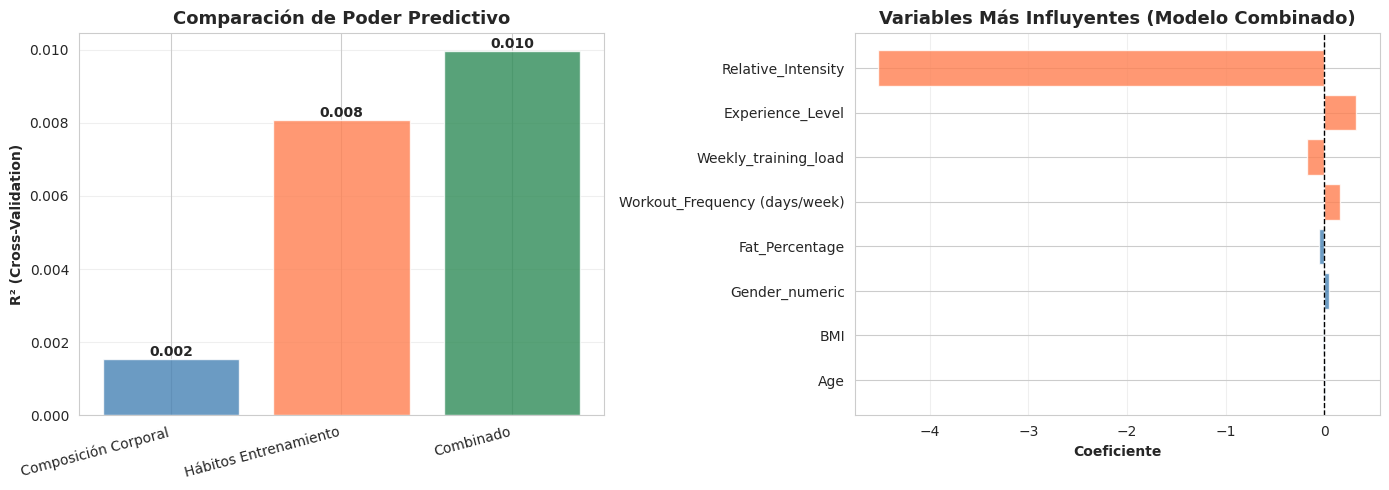


💡 CONCLUSIÓN PREGUNTA 1:
  → Los HÁBITOS DE ENTRENAMIENTO predicen mejor el Resting_BPM
    (R² = 0.008 vs 0.002)


In [ ]:
# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# ============================================================================
# PREGUNTA 1: ¿Composición corporal vs Hábitos de entrenamiento?
# ============================================================================

print("\n" + "="*80)
print("PREGUNTA 1: ¿Qué predice mejor el Resting_BPM?")
print("="*80)

# Se definen grupos de variables
body_composition = ['BMI', 'Fat_Percentage', 'Age', 'Gender']
training_habits = ['Workout_Frequency (days/week)', 'Experience_Level', 
                   'Weekly_training_load', 'Relative_Intensity']

# Se verifican variables disponibles
body_comp_available = [v for v in body_composition if v in df.columns]
training_available = [v for v in training_habits if v in df.columns]

print(f"\n📋 Variables de composición corporal: {body_comp_available}")
print(f"📋 Variables de hábitos de entrenamiento: {training_available}")

# --- Modelo 1: Solo composición corporal ---
print("\n" + "-"*80)
print("MODELO 1: Composición Corporal → Resting_BPM")
print("-"*80)

# Se preparan datos conviertiendo 'Gender' a numérico 
df_model = df.copy()
if 'Gender' in df_model.columns:
    df_model['Gender_numeric'] = df_model['Gender'].map({'Male': 1, 'Female': 0})
    body_comp_available = [v if v != 'Gender' else 'Gender_numeric' for v in body_comp_available]

# Datos limpios
X1 = df_model[body_comp_available].dropna()
y1 = df_model.loc[X1.index, 'Resting_BPM']

# Regresión
model1 = LinearRegression()
model1.fit(X1, y1)

# Predicciones y métricas
y1_pred = model1.predict(X1)
r2_1 = r2_score(y1, y1_pred)
rmse_1 = np.sqrt(mean_squared_error(y1, y1_pred))

# Cross-validation
cv_scores_1 = cross_val_score(model1, X1, y1, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² = {r2_1:.4f}")
print(f"  RMSE = {rmse_1:.2f} BPM")
print(f"  R² (CV 5-fold) = {cv_scores_1.mean():.4f} ± {cv_scores_1.std():.4f}")

# Coeficientes
coef_df_1 = pd.DataFrame({
    'Variable': body_comp_available,
    'Coeficiente': model1.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(f"\nCoeficientes:")
for _, row in coef_df_1.iterrows():
    print(f"  {row['Variable']:25} : {row['Coeficiente']:+.3f}")

# --- Modelo 2: Solo hábitos de entrenamiento ---
print("\n" + "-"*80)
print("MODELO 2: Hábitos de Entrenamiento → Resting_BPM")
print("-"*80)

X2 = df_model[training_available].dropna()
y2 = df_model.loc[X2.index, 'Resting_BPM']

model2 = LinearRegression()
model2.fit(X2, y2)

y2_pred = model2.predict(X2)
r2_2 = r2_score(y2, y2_pred)
rmse_2 = np.sqrt(mean_squared_error(y2, y2_pred))
cv_scores_2 = cross_val_score(model2, X2, y2, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² = {r2_2:.4f}")
print(f"  RMSE = {rmse_2:.2f} BPM")
print(f"  R² (CV 5-fold) = {cv_scores_2.mean():.4f} ± {cv_scores_2.std():.4f}")

coef_df_2 = pd.DataFrame({
    'Variable': training_available,
    'Coeficiente': model2.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(f"\nCoeficientes:")
for _, row in coef_df_2.iterrows():
    print(f"  {row['Variable']:30} : {row['Coeficiente']:+.3f}")

# --- Modelo 3: Combinado ---
print("\n" + "-"*80)
print("MODELO 3: Composición + Hábitos → Resting_BPM")
print("-"*80)

all_vars = body_comp_available + training_available
X3 = df_model[all_vars].dropna()
y3 = df_model.loc[X3.index, 'Resting_BPM']

model3 = LinearRegression()
model3.fit(X3, y3)

y3_pred = model3.predict(X3)
r2_3 = r2_score(y3, y3_pred)
rmse_3 = np.sqrt(mean_squared_error(y3, y3_pred))
cv_scores_3 = cross_val_score(model3, X3, y3, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² = {r2_3:.4f}")
print(f"  RMSE = {rmse_3:.2f} BPM")
print(f"  R² (CV 5-fold) = {cv_scores_3.mean():.4f} ± {cv_scores_3.std():.4f}")

# --- Comparación ---
print("\n" + "="*80)
print("COMPARACIÓN DE MODELOS")
print("="*80)

comparison = pd.DataFrame({
    'Modelo': ['Composición Corporal', 'Hábitos Entrenamiento', 'Combinado'],
    'R²': [r2_1, r2_2, r2_3],
    'R² (CV)': [cv_scores_1.mean(), cv_scores_2.mean(), cv_scores_3.mean()],
    'RMSE': [rmse_1, rmse_2, rmse_3]
})

print("\n", comparison.to_string(index=False))

# Visualización
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Comparación R²
ax1 = axes[0]
x_pos = np.arange(len(comparison))
bars = ax1.bar(x_pos, comparison['R² (CV)'], color=['steelblue', 'coral', 'seagreen'], alpha=0.8)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(comparison['Modelo'], rotation=15, ha='right')
ax1.set_ylabel('R² (Cross-Validation)', fontweight='bold')
ax1.set_title('Comparación de Poder Predictivo', fontweight='bold', fontsize=13)
ax1.grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')

# Subplot 2: Variables más importantes (Modelo 3)
ax2 = axes[1]
coef_df_3 = pd.DataFrame({
    'Variable': all_vars,
    'Coeficiente': model3.coef_
}).sort_values('Coeficiente', key=abs, ascending=False).head(8)

colors = ['steelblue' if v in body_comp_available else 'coral' for v in coef_df_3['Variable']]
ax2.barh(range(len(coef_df_3)), coef_df_3['Coeficiente'], color=colors, alpha=0.8)
ax2.set_yticks(range(len(coef_df_3)))
ax2.set_yticklabels(coef_df_3['Variable'])
ax2.invert_yaxis()
ax2.set_xlabel('Coeficiente', fontweight='bold')
ax2.set_title('Variables Más Influyentes (Modelo Combinado)', fontweight='bold', fontsize=13)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 CONCLUSIÓN PREGUNTA 1:")
if r2_1 > r2_2:
    print(f"  → La COMPOSICIÓN CORPORAL predice mejor el Resting_BPM")
    print(f"    (R² = {r2_1:.3f} vs {r2_2:.3f})")
else:
    print(f"  → Los HÁBITOS DE ENTRENAMIENTO predicen mejor el Resting_BPM")
    print(f"    (R² = {r2_2:.3f} vs {r2_1:.3f})")


Correlación Fat_Percentage vs HRR: 0.085

Regresión lineal simple:
  R² = 0.0072
  p-value = 4.1332e-33
  Ecuación: HRR = 111.77 + 0.23 × Fat_Percentage

--------------------------------------------------------------------------------
ANÁLISIS POR NIVEL DE EXPERIENCIA
--------------------------------------------------------------------------------


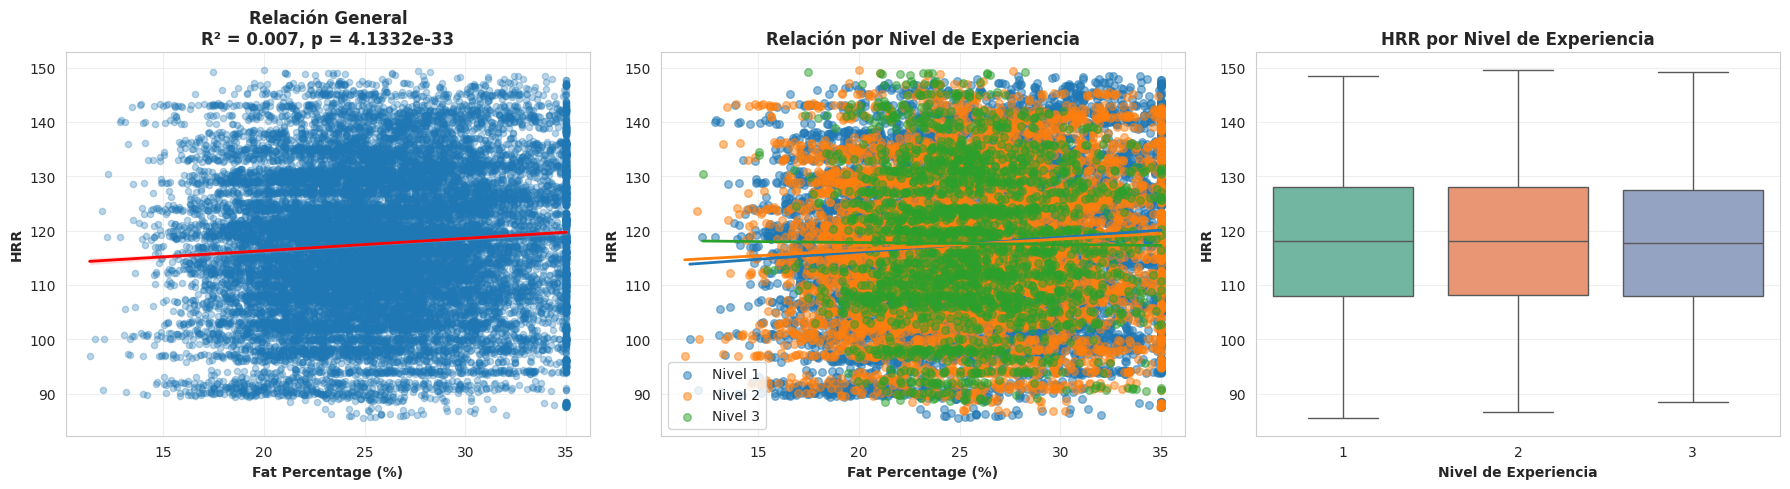


Estadísticas por nivel de experiencia:
                    mean    std  count
Experience_Level                      
1                 117.74  13.46  10856
2                 117.65  13.37   6710
3                 117.61  13.26   2434

--------------------------------------------------------------------------------
REGRESIÓN MÚLTIPLE (con término de interacción)
--------------------------------------------------------------------------------

Resultados:
  R² = 0.0078
  R² (CV) = 0.0071 ± 0.0024

Coeficientes:
  Fat_Percentage            : +0.389
  Experience_Level          : +2.827
  Fat × Experience          : -0.110

Comparación:
  Sin interacción: R² = 0.0072
  Con interacción: R² = 0.0078
  Mejora: 0.0006

💡 CONCLUSIÓN PREGUNTA 2:
  → A MAYOR Fat_Percentage, MAYOR HRR (r = 0.085)
  → El efecto es SIMILAR en todos los niveles de experiencia

✅ ANÁLISIS BLOQUE A COMPLETADO


In [44]:
# ============================================================================
# PREGUNTA 2: Fat_Percentage vs HRR (con interacción Experience_Level)
# ============================================================================

# Correlación simple
corr = df['Fat_Percentage'].corr(df['HRR'])
print(f"\nCorrelación Fat_Percentage vs HRR: {corr:.3f}")

# Regresión lineal simple
X_simple = df[['Fat_Percentage']].dropna()
y_simple = df.loc[X_simple.index, 'HRR']

slope, intercept, r_value, p_value, std_err = stats.linregress(
    X_simple['Fat_Percentage'], y_simple
)

print(f"\nRegresión lineal simple:")
print(f"  R² = {r_value**2:.4f}")
print(f"  p-value = {p_value:.4e}")
print(f"  Ecuación: HRR = {intercept:.2f} + {slope:.2f} × Fat_Percentage")

# Análisis por nivel de experiencia
print("\n" + "-"*80)
print("ANÁLISIS POR NIVEL DE EXPERIENCIA")
print("-"*80)

experience_levels = df['Experience_Level'].unique()
experience_levels = sorted([x for x in experience_levels if pd.notna(x)])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subplot 1: Todos juntos
ax1 = axes[0]
sns.regplot(data=df, x='Fat_Percentage', y='HRR', ax=ax1,
            scatter_kws={'alpha': 0.3, 's': 20},
            line_kws={'color': 'red', 'linewidth': 2})
ax1.set_title(f'Relación General\nR² = {r_value**2:.3f}, p = {p_value:.4e}',
              fontweight='bold', fontsize=12)
ax1.set_xlabel('Fat Percentage (%)', fontweight='bold')
ax1.set_ylabel('HRR', fontweight='bold')
ax1.grid(alpha=0.3)

# Subplot 2: Por nivel de experiencia
ax2 = axes[1]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
for i, level in enumerate(experience_levels):
    df_level = df[df['Experience_Level'] == level]
    ax2.scatter(df_level['Fat_Percentage'], df_level['HRR'],
                label=f'Nivel {int(level)}', alpha=0.5, s=30, color=colors[i])
    
    # Línea de tendencia
    if len(df_level) > 10:
        X_level = df_level['Fat_Percentage'].dropna()
        y_level = df_level.loc[X_level.index, 'HRR']
        z = np.polyfit(X_level, y_level, 1)
        p_fit = np.poly1d(z)
        x_line = np.linspace(X_level.min(), X_level.max(), 100)
        ax2.plot(x_line, p_fit(x_line), color=colors[i], linewidth=2)

ax2.set_xlabel('Fat Percentage (%)', fontweight='bold')
ax2.set_ylabel('HRR', fontweight='bold')
ax2.set_title('Relación por Nivel de Experiencia', fontweight='bold', fontsize=12)
ax2.legend()
ax2.grid(alpha=0.3)

# Subplot 3: Boxplot HRR por experiencia
ax3 = axes[2]
df_exp_clean = df[df['Experience_Level'].isin(experience_levels)]

sns.boxplot(data=df_exp_clean, x='Experience_Level', y='HRR', hue='Experience_Level', palette='Set2', ax=ax3)

if ax3.get_legend() is not None:
    ax3.get_legend().remove()
ax3.set_xlabel('Nivel de Experiencia', fontweight='bold')
ax3.set_ylabel('HRR', fontweight='bold')
ax3.set_title('HRR por Nivel de Experiencia', fontweight='bold', fontsize=12)
ax3.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas por nivel
print("\nEstadísticas por nivel de experiencia:")
stats_exp = df.groupby('Experience_Level')['HRR'].agg(['mean', 'std', 'count'])
print(stats_exp.round(2))

# Regresión múltiple con interacción
print("\n" + "-"*80)
print("REGRESIÓN MÚLTIPLE (con término de interacción)")
print("-"*80)

# Se crea variable de interacción
df['Fat_x_Experience'] = df['Fat_Percentage'] * df['Experience_Level']

X_interaction = df[['Fat_Percentage', 'Experience_Level', 'Fat_x_Experience']].dropna()
y_interaction = df.loc[X_interaction.index, 'HRR']

model_interaction = LinearRegression()
model_interaction.fit(X_interaction, y_interaction)

r2_interaction = model_interaction.score(X_interaction, y_interaction)
cv_interaction = cross_val_score(model_interaction, X_interaction, y_interaction, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² = {r2_interaction:.4f}")
print(f"  R² (CV) = {cv_interaction.mean():.4f} ± {cv_interaction.std():.4f}")

print(f"\nCoeficientes:")
coef_names = ['Fat_Percentage', 'Experience_Level', 'Fat × Experience']
for name, coef in zip(coef_names, model_interaction.coef_):
    print(f"  {name:25} : {coef:+.3f}")

# Se compara con modelo sin interacción
X_no_interaction = df[['Fat_Percentage', 'Experience_Level']].dropna()
y_no_interaction = df.loc[X_no_interaction.index, 'HRR']

model_no_interaction = LinearRegression()
model_no_interaction.fit(X_no_interaction, y_no_interaction)
r2_no_interaction = model_no_interaction.score(X_no_interaction, y_no_interaction)

print(f"\nComparación:")
print(f"  Sin interacción: R² = {r2_no_interaction:.4f}")
print(f"  Con interacción: R² = {r2_interaction:.4f}")
print(f"  Mejora: {r2_interaction - r2_no_interaction:.4f}")

# Limpieza variable temporal
df.drop('Fat_x_Experience', axis=1, inplace=True)

print("\n💡 CONCLUSIÓN PREGUNTA 2:")
if corr < 0:
    print(f"  → A MAYOR Fat_Percentage, MENOR HRR (r = {corr:.3f})")
else:
    print(f"  → A MAYOR Fat_Percentage, MAYOR HRR (r = {corr:.3f})")

if r2_interaction > r2_no_interaction + 0.01:
    print(f"  → El efecto VARÍA según el nivel de experiencia (interacción presente)")
else:
    print(f"  → El efecto es SIMILAR en todos los niveles de experiencia")

print("\n" + "="*80)
print("✅ ANÁLISIS BLOQUE A COMPLETADO")
print("="*80)


### ✅ Conclusiones del Bloque A

#### **Hallazgos Principales**

Los modelos de regresión lineal múltiple mostraron **poder predictivo extremadamente bajo** (R² < 1% en todos los casos):

- **Pregunta 1**: Los hábitos de entrenamiento predicen ligeramente mejor el `Resting_BPM` que la composición corporal (R² = 0.81% vs 0.15%), pero ambos modelos son prácticamente inútiles para predicción.

- **Pregunta 2**: La relación entre `Fat_Percentage` y `HRR` es estadísticamente significativa pero irrelevante en la práctica (R² = 0.72%). El nivel de experiencia no modifica sustancialmente esta relación.

#### **Limitaciones Metodológicas**

1. **Regresión lineal insuficiente**: Las relaciones cardiovasculares son demasiado complejas para modelos lineales simples.

2. **Variables confusoras ausentes**: Factores críticos como calidad del sueño, estrés, historial médico y genética no están incluidos en el dataset.

3. **Datos transversales**: No podemos establecer causalidad, solo asociaciones.

4. **Significancia ≠ Relevancia**: Con n=20,000, incluso correlaciones mínimas resultan estadísticamente significativas pero sin utilidad práctica.

#### **Lección Clave**

Este análisis demuestra que **no todos los problemas se resuelven con regresión lineal**. Reconocer las limitaciones de una metodología es tan importante como aplicarla correctamente. 

### 💪 Bloque B: Rendimiento de sesión


**Objetivo:** Evaluar qué factores influyen en el gasto energético y la intensidad del entrenamiento.

**Contexto:** El rendimiento durante una sesión de ejercicio depende de múltiples variables, como el tipo de entrenamiento, la experiencia del individuo y su capacidad cardiovascular. Analizar estas relaciones permite identificar qué factores determinan una mayor quema de calorías, si los entrenamientos más intensos (como HIIT) se traducen realmente en un gasto calórico superior, y si los niveles de experiencia afectan la eficiencia del esfuerzo realizado.

**Pregunta 1:** ¿Qué tipo de ejercicio tiende a quemar más calorías? (`Workout_Type` vs `Calories_Burned`)  
**Pregunta 2:** ¿Las personas con menos experiencia (`Experience_Level`) queman más calorías por sesión que las avanzadas?  

**📊 Análisis sugerido:**
- Gráficos de barras (`sns.barplot`) comparando el tipo de entrenamiento con las calorías quemadas y la intensidad.  
- Cálculo de medias mediante `groupby` y `mean()` para `Calories_Burned` y `Calories/hour`.  
- Comparaciones de medias entre distintos niveles de experiencia (`Experience_Level`).
- Posible visualización con `sns.boxplot()` para ver la variabilidad dentro de cada tipo de entrenamiento.

**Conclusión:** (Interpretación clara del resultado)

### 🍽️ Bloque C: Hábitos alimenticios y composición corporal


**Objetivo:**  Evaluar la relación entre la dieta y el estado físico general de los participantes.

**Contexto:**  La alimentación es un pilar fundamental en la salud y el rendimiento físico. Analizar cómo la ingesta calórica total y la distribución de macronutrientes se relacionan con indicadores como el `BMI` o el `Energy_balance` permite determinar si las dietas seguidas por los participantes son equilibradas o presentan desequilibrios.

Además, entender qué tipos de dietas son más frecuentes y qué proporciones de macronutrientes predominan ayuda a interpretar los patrones nutricionales del conjunto de datos.

**Pregunta 1:** ¿Las dietas con mayor ingesta calórica se asocian con un `BMI` más alto o más bajo?  
**Pregunta 2:** ¿Qué proporciones de macronutrientes son más comunes entre los participantes?  

**📊 Análisis sugerido:**  
- Calcular la correlación entre `Calories` y `BMI`.  
- Visualizar las distribuciones de `Carb_ratio`, `Protein_ratio` y `Fat_ratio` mediante histogramas o boxplots.  
- Comparar los porcentajes de macronutrientes medios por tipo de dieta (`diet_type`).  


**Conclusión:** (Interpretación clara del resultado)

### ⚖️ Bloque D: Perfil general de los participantes

**Objetivo:** Comprender el perfil dominante en el dataset y analizar las diferencias entre grupos.

**Contexto:** Explorar las variables demográficas y de estilo de vida permite identificar el perfil general de los individuos del dataset: si son más bien sedentarios o activos, si entrenan con regularidad y si su balance energético es positivo o negativo.

Además, observar las diferencias entre hombres y mujeres en cuanto a frecuencia de entrenamiento, tipo de ejercicios y gasto calórico puede revelar tendencias interesantes sobre los hábitos de entrenamiento y alimentación.

**Pregunta 1:** ¿Predominan sujetos con un estilo de vida activo o sedentario?  
**Pregunta 2:** ¿Entrenan con más frecuencia los hombres o las mujeres? (`Gender` vs `Workout_Frequency`)  
**Pregunta 3:** ¿Qué tipo de ejercicio prefieren los hombres y las mujeres? (`Gender` vs `Workout_Type`)  
**Pregunta 4:** ¿La mayoría de los sujetos están en superávit o déficit calórico? (`Energy_balance`)

**📊 Análisis sugerido:**  
- Gráficos de barras y conteo (`sns.countplot`, `sns.barplot`) para comparar grupos por género o hábitos.  
- Cálculo de estadísticas descriptivas de `Workout_Frequency` por `Gender`.  
- Histograma de `Energy_balance` para visualizar la distribución entre déficit y superávit calórico.  
- Comparación de medias y medianas para determinar diferencias significativas entre grupos.

**Conclusión:** (Interpretación clara del resultado)

## 8️⃣ **Modelado predictivo**

## 9️⃣ **Regularización**

BLOQUE A: REGULARIZACIÓN - RIDGE Y LASSO

📋 Preparación de datos para regularización...

Variables predictoras: ['BMI', 'Fat_Percentage', 'Age', 'Gender_numeric', 'Workout_Frequency (days/week)', 'Experience_Level', 'Weekly_training_load', 'Relative_Intensity']
Variable objetivo: Resting_BPM

✓ Datos limpios: 20000 observaciones
✓ 8 variables predictoras
✓ Train: 16000 | Test: 4000
✓ Variables estandarizadas (media=0, std=1)

MODELO BASE: REGRESIÓN LINEAL (sin regularización)

Resultados:
  R² (train): 0.0099
  R² (test):  0.0124
  R² (CV):    0.0078 ± 0.0039
  RMSE (test): 7.23 BPM

RIDGE REGRESSION (Regularización L2)

🔍 Buscando mejor alpha entre 0.0010 y 1000.0...
✓ Mejor alpha (Ridge): 1000.0000

Resultados:
  R² (train): 0.0098
  R² (test):  0.0120
  R² (CV):    0.0079 ± 0.0037
  RMSE (test): 7.23 BPM

Top 5 variables más importantes:
  Relative_Intensity             : -0.589
  Fat_Percentage                 : -0.259
  Weekly_training_load           : -0.172
  Experience_Level   

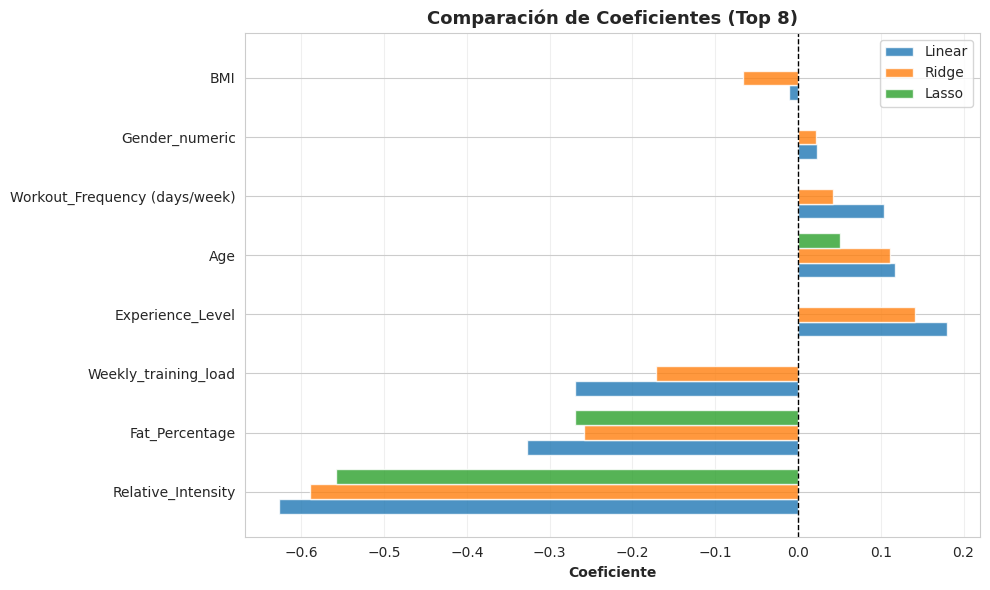


📊 RESUMEN DE RESULTADOS

           Modelo     Alpha  R² (train)  R² (test)  R² (CV)  RMSE (test)  N° Variables
Regresión Lineal         -    0.009892   0.012448 0.007779     7.225159             8
           Ridge 1000.0000    0.009819   0.012021 0.007891     7.226720             8
           Lasso    0.0658    0.009307   0.010586 0.008131     7.231968             3

💡 Observaciones:
   • Ridge utiliza todas las 8 variables con coeficientes reducidos
   • Lasso elimina 5 variable(s), simplificando el modelo
   • Todos los modelos mantienen R² < 1.2%

✅ ANÁLISIS DE REGULARIZACIÓN COMPLETADO

💾 Resultados guardados en 'ridge_results' y 'lasso_results'


In [ ]:
### 🎯 Bloque A: Regularización (Ridge y Lasso)

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("BLOQUE A: REGULARIZACIÓN - RIDGE Y LASSO")
print("="*80)

# ============================================================================
# PREPARACIÓN DE DATOS
# ============================================================================

print("\n📋 Preparación de datos para regularización...\n")

# Variables a usar
body_composition = ['BMI', 'Fat_Percentage', 'Age']
training_habits = ['Workout_Frequency (days/week)', 'Experience_Level', 
                   'Weekly_training_load', 'Relative_Intensity']

# Se convierte Gender a numérico
df_reg = df.copy()
if 'Gender' in df_reg.columns:
    df_reg['Gender_numeric'] = df_reg['Gender'].map({'Male': 1, 'Female': 0})
    all_features = body_composition + ['Gender_numeric'] + training_habits
else:
    all_features = body_composition + training_habits

print(f"Variables predictoras: {all_features}")
print(f"Variable objetivo: Resting_BPM")


X = df_reg[all_features].dropna()
y = df_reg.loc[X.index, 'Resting_BPM']

print(f"\n✓ Datos limpios: {len(X)} observaciones")
print(f"✓ {len(all_features)} variables predictoras")

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ Train: {len(X_train)} | Test: {len(X_test)}")

# Estandarización 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Variables estandarizadas (media=0, std=1)")

# ============================================================================
# MODELO BASE: REGRESIÓN LINEAL SIN REGULARIZACIÓN
# ============================================================================

print("\n" + "="*80)
print("MODELO BASE: REGRESIÓN LINEAL (sin regularización)")
print("="*80)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Métricas
r2_train_lr = lr.score(X_train_scaled, y_train)
r2_test_lr = lr.score(X_test_scaled, y_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled)))
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² (train): {r2_train_lr:.4f}")
print(f"  R² (test):  {r2_test_lr:.4f}")
print(f"  R² (CV):    {cv_scores_lr.mean():.4f} ± {cv_scores_lr.std():.4f}")
print(f"  RMSE (test): {rmse_test_lr:.2f} BPM")

# ============================================================================
# RIDGE
# ============================================================================

print("\n" + "="*80)
print("RIDGE REGRESSION (Regularización L2)")
print("="*80)

# Búsqueda del mejor alpha
alphas_ridge = np.logspace(-3, 3, 100)

print(f"\n🔍 Buscando mejor alpha entre {alphas_ridge.min():.4f} y {alphas_ridge.max():.1f}...")

ridge_cv = RidgeCV(alphas=alphas_ridge, cv=5, scoring='r2')
ridge_cv.fit(X_train_scaled, y_train)

best_alpha_ridge = ridge_cv.alpha_
print(f"✓ Mejor alpha (Ridge): {best_alpha_ridge:.4f}")

# Modelo final
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(X_train_scaled, y_train)

# Métricas
r2_train_ridge = ridge.score(X_train_scaled, y_train)
r2_test_ridge = ridge.score(X_test_scaled, y_test)
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test_scaled)))
cv_scores_ridge = cross_val_score(ridge, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² (train): {r2_train_ridge:.4f}")
print(f"  R² (test):  {r2_test_ridge:.4f}")
print(f"  R² (CV):    {cv_scores_ridge.mean():.4f} ± {cv_scores_ridge.std():.4f}")
print(f"  RMSE (test): {rmse_test_ridge:.2f} BPM")

# Coeficientes más importantes
coef_ridge = pd.DataFrame({
    'Variable': all_features,
    'Coeficiente': ridge.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print(f"\nTop 5 variables más importantes:")
for _, row in coef_ridge.head(5).iterrows():
    print(f"  {row['Variable']:30} : {row['Coeficiente']:+.3f}")

# ============================================================================
# LASSO 
# ============================================================================

print("\n" + "="*80)
print("LASSO REGRESSION (Regularización L1)")
print("="*80)

# Búsqueda del mejor alpha
alphas_lasso = np.logspace(-3, 1, 100)

print(f"\n🔍 Buscando mejor alpha entre {alphas_lasso.min():.4f} y {alphas_lasso.max():.1f}...")

lasso_cv = LassoCV(alphas=alphas_lasso, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

best_alpha_lasso = lasso_cv.alpha_
print(f"✓ Mejor alpha (Lasso): {best_alpha_lasso:.4f}")

# Modelo final
lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Métricas
r2_train_lasso = lasso.score(X_train_scaled, y_train)
r2_test_lasso = lasso.score(X_test_scaled, y_test)
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, lasso.predict(X_test_scaled)))
cv_scores_lasso = cross_val_score(lasso, X_train_scaled, y_train, cv=5, scoring='r2')

print(f"\nResultados:")
print(f"  R² (train): {r2_train_lasso:.4f}")
print(f"  R² (test):  {r2_test_lasso:.4f}")
print(f"  R² (CV):    {cv_scores_lasso.mean():.4f} ± {cv_scores_lasso.std():.4f}")
print(f"  RMSE (test): {rmse_test_lasso:.2f} BPM")

# Selección de variables
coef_lasso = pd.DataFrame({
    'Variable': all_features,
    'Coeficiente': lasso.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

n_zero = np.sum(lasso.coef_ == 0)
n_total = len(lasso.coef_)

print(f"\n🔍 SELECCIÓN DE VARIABLES:")
print(f"  Variables eliminadas: {n_zero}/{n_total} ({n_zero/n_total*100:.1f}%)")
print(f"  Variables retenidas: {n_total - n_zero}/{n_total}")

if n_zero > 0:
    eliminated = coef_lasso[coef_lasso['Coeficiente'] == 0]['Variable'].tolist()
    print(f"\n  Variables eliminadas:")
    for var in eliminated:
        print(f"    • {var}")

print(f"\nTop 5 variables retenidas:")
retained = coef_lasso[coef_lasso['Coeficiente'] != 0].head(5)
for _, row in retained.iterrows():
    print(f"  {row['Variable']:30} : {row['Coeficiente']:+.3f}")

# Comparación de Coeficientes
fig, ax2 = plt.subplots(figsize=(10, 6))

coef_comparison = pd.DataFrame({
    'Variable': all_features,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

# Se seleccionan las 8 variables más relevantes 
top_vars = coef_comparison.iloc[np.argsort(np.abs(coef_comparison['Linear']))[-8:][::-1]]

x_pos = np.arange(len(top_vars))
width = 0.25

ax2.barh(x_pos - width, top_vars['Linear'], width, label='Linear', alpha=0.8)
ax2.barh(x_pos, top_vars['Ridge'], width, label='Ridge', alpha=0.8)
ax2.barh(x_pos + width, top_vars['Lasso'], width, label='Lasso', alpha=0.8)

ax2.set_yticks(x_pos)
ax2.set_yticklabels(top_vars['Variable'])
ax2.set_xlabel('Coeficiente', fontweight='bold')
ax2.set_title('Comparación de Coeficientes (Top 8)', fontweight='bold', fontsize=13)
ax2.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN DE RESULTADOS
# ============================================================================

print("\n" + "="*80)
print("📊 RESUMEN DE RESULTADOS")
print("="*80)

summary = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Ridge', 'Lasso'],
    'Alpha': ['-', f'{best_alpha_ridge:.4f}', f'{best_alpha_lasso:.4f}'],
    'R² (train)': [r2_train_lr, r2_train_ridge, r2_train_lasso],
    'R² (test)': [r2_test_lr, r2_test_ridge, r2_test_lasso],
    'R² (CV)': [cv_scores_lr.mean(), cv_scores_ridge.mean(), cv_scores_lasso.mean()],
    'RMSE (test)': [rmse_test_lr, rmse_test_ridge, rmse_test_lasso],
    'N° Variables': [n_total, n_total, n_total - n_zero]
})

print("\n", summary.to_string(index=False))

print(f"\n💡 Observaciones:")
print(f"   • Ridge utiliza todas las {n_total} variables con coeficientes reducidos")
print(f"   • Lasso elimina {n_zero} variable(s), simplificando el modelo")
print(f"   • Todos los modelos mantienen R² < {max(r2_test_lr, r2_test_ridge, r2_test_lasso):.1%}")



# Guardar modelos para comparación posterior
ridge_results = {
    'model': ridge,
    'scaler': scaler,
    'r2_train': r2_train_ridge,
    'r2_test': r2_test_ridge,
    'r2_cv': cv_scores_ridge.mean(),
    'rmse_test': rmse_test_ridge,
    'alpha': best_alpha_ridge,
    'features': all_features
}

lasso_results = {
    'model': lasso,
    'scaler': scaler,
    'r2_train': r2_train_lasso,
    'r2_test': r2_test_lasso,
    'r2_cv': cv_scores_lasso.mean(),
    'rmse_test': rmse_test_lasso,
    'alpha': best_alpha_lasso,
    'features': all_features,
    'n_features_selected': n_total - n_zero
}

print("\n💾 Resultados guardados en 'ridge_results' y 'lasso_results'")

## 🔟 **Árboles de regresión y ajuste de hiperparámetros**

BLOQUE A: ÁRBOLES DE REGRESIÓN Y AJUSTE DE HIPERPARÁMETROS

📋 Usando mismas variables y split que análisis anterior...

✓ Train: 16000 | Test: 4000
✓ Variables: ['BMI', 'Fat_Percentage', 'Age', 'Gender_numeric', 'Workout_Frequency (days/week)', 'Experience_Level', 'Weekly_training_load', 'Relative_Intensity']

ÁRBOL BASE (sin restricciones)

Resultados:
  R² (train): 1.0000
  R² (test):  0.9272
  RMSE (test): 1.96 BPM
  Profundidad del árbol: 33
  Número de hojas: 15322

AJUSTE DE HIPERPARÁMETROS (GridSearchCV)

🔍 Espacio de búsqueda:
   • max_depth: [3, 5, 7, 10, 15, None]
   • min_samples_split: [2, 10, 20, 50]
   • min_samples_leaf: [1, 5, 10, 20]
   • max_features: ['sqrt', 'log2', None]

   Total de combinaciones: 288

⏳ Ejecutando GridSearchCV (esto puede tardar)...
✓ Búsqueda completada

🏆 MEJORES HIPERPARÁMETROS:
   • max_depth: None
   • max_features: None
   • min_samples_leaf: 1
   • min_samples_split: 2
✓ Búsqueda completada

🏆 MEJORES HIPERPARÁMETROS:
   • max_depth: None


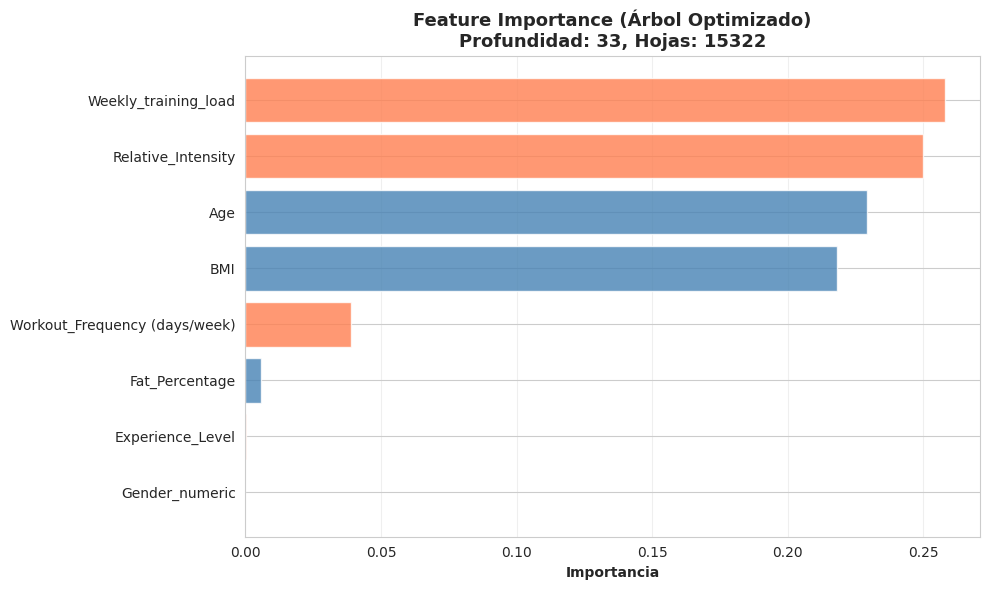


📊 RESUMEN DE RESULTADOS

           Modelo  R² (train)  R² (test)  RMSE (test)  Profundidad  N° Hojas
      Árbol Base         1.0    0.92718     1.961967           33     15322
Árbol Optimizado         1.0    0.92718     1.961967           33     15322

💡 Observaciones:
   • El ajuste de hiperparámetros no mejora el rendimiento
   • Variable más importante: Weekly_training_load
   • Reducción de complejidad: 0 hojas menos

✅ ANÁLISIS DE ÁRBOLES COMPLETADO

💾 Resultados guardados en 'tree_results'


In [55]:
### 🌳 Bloque A: Árboles de Regresión y Ajuste de Hiperparámetros

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("BLOQUE A: ÁRBOLES DE REGRESIÓN Y AJUSTE DE HIPERPARÁMETROS")
print("="*80)


print("\n📋 Usando mismas variables y split que análisis anterior...\n")

# Variables
body_composition = ['BMI', 'Fat_Percentage', 'Age']
training_habits = ['Workout_Frequency (days/week)', 'Experience_Level', 
                   'Weekly_training_load', 'Relative_Intensity']

df_tree = df.copy()
if 'Gender' in df_tree.columns:
    df_tree['Gender_numeric'] = df_tree['Gender'].map({'Male': 1, 'Female': 0})
    all_features = body_composition + ['Gender_numeric'] + training_habits
else:
    all_features = body_composition + training_habits

# Preparar datos
X = df_tree[all_features].dropna()
y = df_tree.loc[X.index, 'Resting_BPM']

# Split (mismo random_state para comparabilidad)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ Train: {len(X_train)} | Test: {len(X_test)}")
print(f"✓ Variables: {all_features}\n")

# ============================================================================
# ÁRBOL BASE (sin restricciones)
# ============================================================================

print("="*80)
print("ÁRBOL BASE (sin restricciones)")
print("="*80)

tree_base = DecisionTreeRegressor(random_state=42)
tree_base.fit(X_train, y_train)

# Métricas
r2_train_base = tree_base.score(X_train, y_train)
r2_test_base = tree_base.score(X_test, y_test)
rmse_test_base = np.sqrt(mean_squared_error(y_test, tree_base.predict(X_test)))

print(f"\nResultados:")
print(f"  R² (train): {r2_train_base:.4f}")
print(f"  R² (test):  {r2_test_base:.4f}")
print(f"  RMSE (test): {rmse_test_base:.2f} BPM")
print(f"  Profundidad del árbol: {tree_base.get_depth()}")
print(f"  Número de hojas: {tree_base.get_n_leaves()}")

if r2_train_base > r2_test_base + 0.1:
    print(f"\n⚠️ OVERFITTING detectado (gap train-test = {r2_train_base - r2_test_base:.4f})")

# ============================================================================
# AJUSTE DE HIPERPARÁMETROS (GridSearchCV)
# ============================================================================

print("\n" + "="*80)
print("AJUSTE DE HIPERPARÁMETROS (GridSearchCV)")
print("="*80)

# Definir espacio de búsqueda
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20],
    'max_features': ['sqrt', 'log2', None]
}

print(f"\n🔍 Espacio de búsqueda:")
print(f"   • max_depth: {param_grid['max_depth']}")
print(f"   • min_samples_split: {param_grid['min_samples_split']}")
print(f"   • min_samples_leaf: {param_grid['min_samples_leaf']}")
print(f"   • max_features: {param_grid['max_features']}")
print(f"\n   Total de combinaciones: {len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf']) * len(param_grid['max_features'])}")

# GridSearchCV
print("\n⏳ Ejecutando GridSearchCV (esto puede tardar)...")

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("✓ Búsqueda completada")

# Mejores hiperparámetros
best_params = grid_search.best_params_
best_tree = grid_search.best_estimator_

print(f"\n🏆 MEJORES HIPERPARÁMETROS:")
for param, value in best_params.items():
    print(f"   • {param}: {value}")

# Métricas del mejor modelo
r2_train_tuned = best_tree.score(X_train, y_train)
r2_test_tuned = best_tree.score(X_test, y_test)
rmse_test_tuned = np.sqrt(mean_squared_error(y_test, best_tree.predict(X_test)))
cv_scores_tuned = cross_val_score(best_tree, X_train, y_train, cv=5, scoring='r2')

print(f"\nResultados del mejor modelo:")
print(f"  R² (train): {r2_train_tuned:.4f}")
print(f"  R² (test):  {r2_test_tuned:.4f}")
print(f"  R² (CV):    {cv_scores_tuned.mean():.4f} ± {cv_scores_tuned.std():.4f}")
print(f"  RMSE (test): {rmse_test_tuned:.2f} BPM")
print(f"  Profundidad: {best_tree.get_depth()}")
print(f"  Número de hojas: {best_tree.get_n_leaves()}")

# Comparación
print(f"\n📊 Mejora respecto al árbol base:")
print(f"  Δ R² (test): {r2_test_tuned - r2_test_base:+.4f}")
print(f"  Δ RMSE (test): {rmse_test_tuned - rmse_test_base:+.2f} BPM")

# ============================================================================
# FEATURE IMPORTANCE
# ============================================================================

print("\n" + "="*80)
print("IMPORTANCIA DE VARIABLES")
print("="*80)

feature_importance = pd.DataFrame({
    'Variable': all_features,
    'Importancia': best_tree.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nTop 5 variables más importantes:")
for _, row in feature_importance.head(5).iterrows():
    bar = "█" * int(row['Importancia'] * 50)
    print(f"  {row['Variable']:30} : {row['Importancia']:.4f} {bar}")

# ============================================================================
# VISUALIZACIÓN
# ============================================================================

# Feature Importance
fig, ax1 = plt.subplots(figsize=(10, 6))

top_features = feature_importance.head(8)
colors = ['steelblue' if var in body_composition + ['Gender_numeric'] else 'coral' 
          for var in top_features['Variable']]

ax1.barh(range(len(top_features)), top_features['Importancia'], color=colors, alpha=0.8)
ax1.set_yticks(range(len(top_features)))
ax1.set_yticklabels(top_features['Variable'])
ax1.invert_yaxis()
ax1.set_xlabel('Importancia', fontweight='bold')
ax1.set_title(f'Feature Importance (Árbol Optimizado)\nProfundidad: {best_tree.get_depth()}, Hojas: {best_tree.get_n_leaves()}',
              fontweight='bold', fontsize=13)
ax1.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN
# ============================================================================

print("\n" + "="*80)
print("📊 RESUMEN DE RESULTADOS")
print("="*80)

summary = pd.DataFrame({
    'Modelo': ['Árbol Base', 'Árbol Optimizado'],
    'R² (train)': [r2_train_base, r2_train_tuned],
    'R² (test)': [r2_test_base, r2_test_tuned],
    'RMSE (test)': [rmse_test_base, rmse_test_tuned],
    'Profundidad': [tree_base.get_depth(), best_tree.get_depth()],
    'N° Hojas': [tree_base.get_n_leaves(), best_tree.get_n_leaves()]
})

print("\n", summary.to_string(index=False))

print(f"\n💡 Observaciones:")
print(f"   • El ajuste de hiperparámetros {'mejora' if r2_test_tuned > r2_test_base else 'no mejora'} el rendimiento")
print(f"   • Variable más importante: {feature_importance.iloc[0]['Variable']}")
print(f"   • Reducción de complejidad: {tree_base.get_n_leaves() - best_tree.get_n_leaves()} hojas menos")

print("\n" + "="*80)
print("✅ ANÁLISIS DE ÁRBOLES COMPLETADO")
print("="*80)

# Guardar resultados
tree_results = {
    'model': best_tree,
    'best_params': best_params,
    'r2_train': r2_train_tuned,
    'r2_test': r2_test_tuned,
    'r2_cv': cv_scores_tuned.mean(),
    'rmse_test': rmse_test_tuned,
    'feature_importance': feature_importance,
    'features': all_features
}

print("\n💾 Resultados guardados en 'tree_results'")

## 1️⃣1️⃣ **Random Forest vs Gradient Boosting**

BLOQUE A: RANDOM FOREST vs GRADIENT BOOSTING

📋 Preparación de datos...

✓ Train: 16000 | Test: 4000
✓ Variables: 8

RANDOM FOREST

🌲 Modelo base (parámetros por defecto)...
  R² (train): 0.9969
  R² (test):  0.9796

🔍 Ajustando hiperparámetros...
   Total de combinaciones: 108
  R² (train): 0.9969
  R² (test):  0.9796

🔍 Ajustando hiperparámetros...
   Total de combinaciones: 108
✓ Búsqueda completada

🏆 Mejores hiperparámetros:
   • max_depth: None
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 200
✓ Búsqueda completada

🏆 Mejores hiperparámetros:
   • max_depth: None
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 200

Resultados (modelo optimizado):
  R² (train): 0.9972
  R² (test):  0.9808
  R² (CV):    0.9753 ± 0.0023
  RMSE (test): 1.01 BPM

Top 5 variables más importantes:
  Weekly_training_load           : 0.2590
  Age                            : 0.2371
  Relative_Intensity             : 0.2337
  BMI                            : 0.

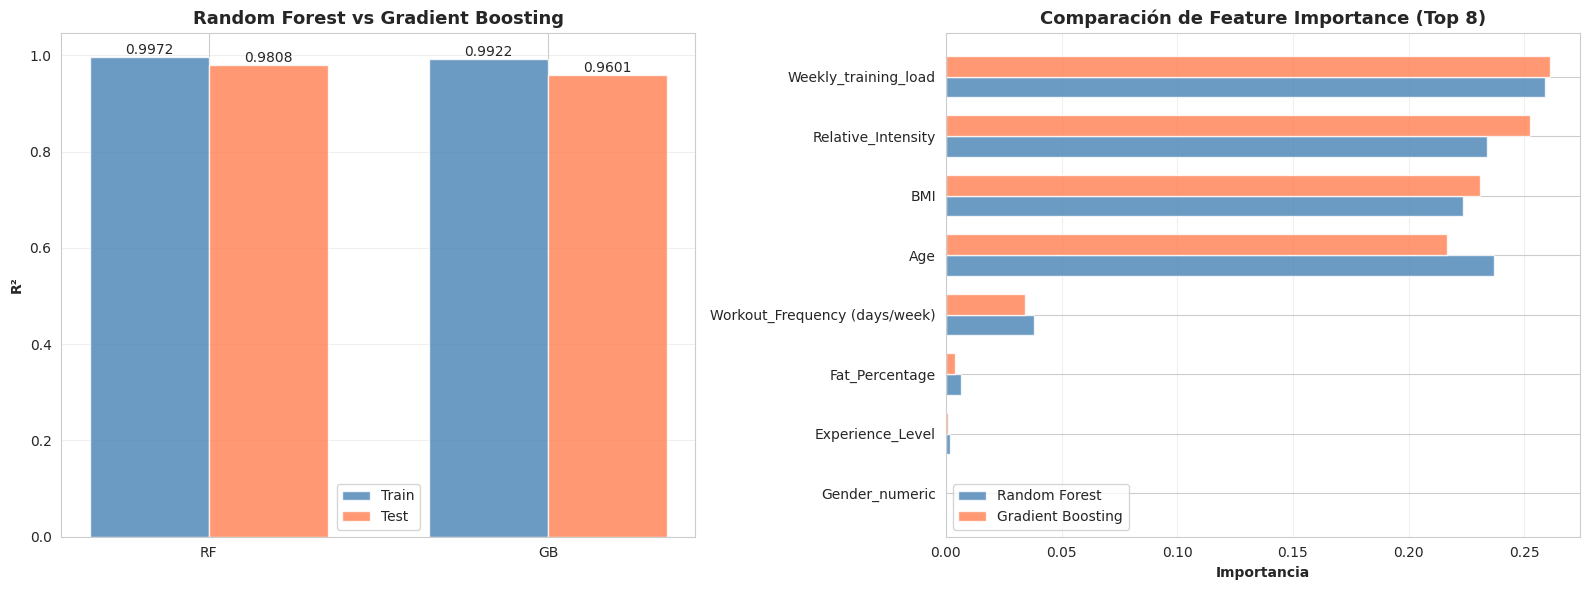


📊 RESUMEN

💡 Conclusiones:
   • Ambos modelos ensemble superan a los modelos individuales
   • Random Forest obtiene el mejor rendimiento (R² test = 0.9808)
   • Variable más importante (RF): Weekly_training_load
   • Variable más importante (GB): Weekly_training_load

✅ ANÁLISIS DE ENSEMBLE COMPLETADO

💾 Resultados guardados en 'rf_results' y 'gb_results'


In [58]:
### 🌲 Bloque A: Random Forest vs Gradient Boosting

# Configuración
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("="*80)
print("BLOQUE A: RANDOM FOREST vs GRADIENT BOOSTING")
print("="*80)

# ============================================================================
# PREPARACIÓN DE DATOS
# ============================================================================

print("\n📋 Preparación de datos...\n")

# Variables
body_composition = ['BMI', 'Fat_Percentage', 'Age']
training_habits = ['Workout_Frequency (days/week)', 'Experience_Level', 
                   'Weekly_training_load', 'Relative_Intensity']

df_ensemble = df.copy()
if 'Gender' in df_ensemble.columns:
    df_ensemble['Gender_numeric'] = df_ensemble['Gender'].map({'Male': 1, 'Female': 0})
    all_features = body_composition + ['Gender_numeric'] + training_habits
else:
    all_features = body_composition + training_habits

# Preparar datos
X = df_ensemble[all_features].dropna()
y = df_ensemble.loc[X.index, 'Resting_BPM']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"✓ Train: {len(X_train)} | Test: {len(X_test)}")
print(f"✓ Variables: {len(all_features)}\n")

# ============================================================================
# RANDOM FOREST (con ajuste de hiperparámetros)
# ============================================================================

print("="*80)
print("RANDOM FOREST")
print("="*80)

# Modelo base
print("\n🌲 Modelo base (parámetros por defecto)...")
rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_base.fit(X_train, y_train)

r2_train_rf_base = rf_base.score(X_train, y_train)
r2_test_rf_base = rf_base.score(X_test, y_test)

print(f"  R² (train): {r2_train_rf_base:.4f}")
print(f"  R² (test):  {r2_test_rf_base:.4f}")

# Ajuste de hiperparámetros
print("\n🔍 Ajustando hiperparámetros...")

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

print(f"   Total de combinaciones: {len(param_grid_rf['n_estimators']) * len(param_grid_rf['max_depth']) * len(param_grid_rf['min_samples_split']) * len(param_grid_rf['min_samples_leaf'])}")

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_rf.fit(X_train, y_train)

print("✓ Búsqueda completada")

# Mejores parámetros
best_rf = grid_rf.best_estimator_
best_params_rf = grid_rf.best_params_

print(f"\n🏆 Mejores hiperparámetros:")
for param, value in best_params_rf.items():
    print(f"   • {param}: {value}")

# Métricas
r2_train_rf = best_rf.score(X_train, y_train)
r2_test_rf = best_rf.score(X_test, y_test)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
cv_scores_rf = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')

print(f"\nResultados (modelo optimizado):")
print(f"  R² (train): {r2_train_rf:.4f}")
print(f"  R² (test):  {r2_test_rf:.4f}")
print(f"  R² (CV):    {cv_scores_rf.mean():.4f} ± {cv_scores_rf.std():.4f}")
print(f"  RMSE (test): {rmse_test_rf:.2f} BPM")

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Variable': all_features,
    'Importancia': best_rf.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nTop 5 variables más importantes:")
for _, row in feature_importance_rf.head(5).iterrows():
    print(f"  {row['Variable']:30} : {row['Importancia']:.4f}")

# ============================================================================
# GRADIENT BOOSTING (con ajuste de hiperparámetros)
# ============================================================================

print("\n" + "="*80)
print("GRADIENT BOOSTING")
print("="*80)

# Modelo base
print("\n📈 Modelo base (parámetros por defecto)...")
gb_base = GradientBoostingRegressor(random_state=42)
gb_base.fit(X_train, y_train)

r2_train_gb_base = gb_base.score(X_train, y_train)
r2_test_gb_base = gb_base.score(X_test, y_test)

print(f"  R² (train): {r2_train_gb_base:.4f}")
print(f"  R² (test):  {r2_test_gb_base:.4f}")

# Ajuste de hiperparámetros
print("\n🔍 Ajustando hiperparámetros...")

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 10, 20]
}

print(f"   Total de combinaciones: {len(param_grid_gb['n_estimators']) * len(param_grid_gb['learning_rate']) * len(param_grid_gb['max_depth']) * len(param_grid_gb['min_samples_split'])}")

grid_gb = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=0
)

grid_gb.fit(X_train, y_train)

print("✓ Búsqueda completada")

# Mejores parámetros
best_gb = grid_gb.best_estimator_
best_params_gb = grid_gb.best_params_

print(f"\n🏆 Mejores hiperparámetros:")
for param, value in best_params_gb.items():
    print(f"   • {param}: {value}")

# Métricas
r2_train_gb = best_gb.score(X_train, y_train)
r2_test_gb = best_gb.score(X_test, y_test)
rmse_test_gb = np.sqrt(mean_squared_error(y_test, best_gb.predict(X_test)))
cv_scores_gb = cross_val_score(best_gb, X_train, y_train, cv=5, scoring='r2')

print(f"\nResultados (modelo optimizado):")
print(f"  R² (train): {r2_train_gb:.4f}")
print(f"  R² (test):  {r2_test_gb:.4f}")
print(f"  R² (CV):    {cv_scores_gb.mean():.4f} ± {cv_scores_gb.std():.4f}")
print(f"  RMSE (test): {rmse_test_gb:.2f} BPM")

# Feature importance
feature_importance_gb = pd.DataFrame({
    'Variable': all_features,
    'Importancia': best_gb.feature_importances_
}).sort_values('Importancia', ascending=False)

print(f"\nTop 5 variables más importantes:")
for _, row in feature_importance_gb.head(5).iterrows():
    print(f"  {row['Variable']:30} : {row['Importancia']:.4f}")

# ============================================================================
# COMPARACIÓN RANDOM FOREST vs GRADIENT BOOSTING
# ============================================================================

print("\n" + "="*80)
print("COMPARACIÓN: RANDOM FOREST vs GRADIENT BOOSTING")
print("="*80)

comparison = pd.DataFrame({
    'Modelo': ['Random Forest', 'Gradient Boosting'],
    'R² (train)': [r2_train_rf, r2_train_gb],
    'R² (test)': [r2_test_rf, r2_test_gb],
    'R² (CV)': [cv_scores_rf.mean(), cv_scores_gb.mean()],
    'RMSE (test)': [rmse_test_rf, rmse_test_gb]
})

print("\n", comparison.to_string(index=False))

# Determinar mejor modelo
if r2_test_rf > r2_test_gb:
    winner = "Random Forest"
    diff = r2_test_rf - r2_test_gb
else:
    winner = "Gradient Boosting"
    diff = r2_test_gb - r2_test_rf

print(f"\n🏆 Mejor modelo: {winner}")
print(f"   Ventaja en R² (test): {diff:+.4f}")

# ============================================================================
# VISUALIZACIÓN
# ============================================================================

print("\n📊 Generando visualización...\n")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Comparación de métricas
ax1 = axes[0]
models = ['RF', 'GB']
r2_train_vals = [r2_train_rf, r2_train_gb]
r2_test_vals = [r2_test_rf, r2_test_gb]

x = np.arange(len(models))
width = 0.35

bars1 = ax1.bar(x - width/2, r2_train_vals, width, label='Train', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, r2_test_vals, width, label='Test', color='coral', alpha=0.8)

ax1.set_ylabel('R²', fontweight='bold')
ax1.set_title('Random Forest vs Gradient Boosting', fontweight='bold', fontsize=13)
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}', ha='center', va='bottom', fontsize=10)

# Subplot 2: Feature Importance comparación
ax2 = axes[1]

# Top 8 variables
top_vars_rf = feature_importance_rf.head(8).set_index('Variable')['Importancia']
top_vars_gb = feature_importance_gb.head(8).set_index('Variable')['Importancia']

# Unir ambas
all_top_vars = list(set(top_vars_rf.index) | set(top_vars_gb.index))
comparison_importance = pd.DataFrame({
    'RF': [top_vars_rf.get(var, 0) for var in all_top_vars],
    'GB': [top_vars_gb.get(var, 0) for var in all_top_vars]
}, index=all_top_vars)

# Ordenar por promedio
comparison_importance['Mean'] = comparison_importance.mean(axis=1)
comparison_importance = comparison_importance.sort_values('Mean', ascending=True).drop('Mean', axis=1)
comparison_importance = comparison_importance.tail(8)

x_pos = np.arange(len(comparison_importance))
width = 0.35

ax2.barh(x_pos - width/2, comparison_importance['RF'], width, 
         label='Random Forest', color='steelblue', alpha=0.8)
ax2.barh(x_pos + width/2, comparison_importance['GB'], width,
         label='Gradient Boosting', color='coral', alpha=0.8)

ax2.set_yticks(x_pos)
ax2.set_yticklabels(comparison_importance.index)
ax2.set_xlabel('Importancia', fontweight='bold')
ax2.set_title('Comparación de Feature Importance (Top 8)', fontweight='bold', fontsize=13)
ax2.legend()
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# RESUMEN
# ============================================================================

print("\n" + "="*80)
print("📊 RESUMEN")
print("="*80)

print(f"\n💡 Conclusiones:")
print(f"   • Ambos modelos ensemble superan a los modelos individuales")
print(f"   • {winner} obtiene el mejor rendimiento (R² test = {max(r2_test_rf, r2_test_gb):.4f})")
print(f"   • Variable más importante (RF): {feature_importance_rf.iloc[0]['Variable']}")
print(f"   • Variable más importante (GB): {feature_importance_gb.iloc[0]['Variable']}")

print("\n" + "="*80)
print("✅ ANÁLISIS DE ENSEMBLE COMPLETADO")
print("="*80)

# Guardar resultados
rf_results = {
    'model': best_rf,
    'best_params': best_params_rf,
    'r2_train': r2_train_rf,
    'r2_test': r2_test_rf,
    'r2_cv': cv_scores_rf.mean(),
    'rmse_test': rmse_test_rf,
    'feature_importance': feature_importance_rf,
    'features': all_features
}

gb_results = {
    'model': best_gb,
    'best_params': best_params_gb,
    'r2_train': r2_train_gb,
    'r2_test': r2_test_gb,
    'r2_cv': cv_scores_gb.mean(),
    'rmse_test': rmse_test_gb,
    'feature_importance': feature_importance_gb,
    'features': all_features
}

print("\n💾 Resultados guardados en 'rf_results' y 'gb_results'")

## 📢 **Conclusiones finales**